In [15]:
import kagglehub
import shutil

import os

# Download latest version
path = kagglehub.dataset_download("jahnavipaliwal/field-of-study-vs-occupation")

# Move dataset to the desired folder
destination = os.path.join("datasets", "field-of-study-vs-occupation")

shutil.move(path, destination)


print("Path to dataset files:", destination)

Path to dataset files: datasets\field-of-study-vs-occupation


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

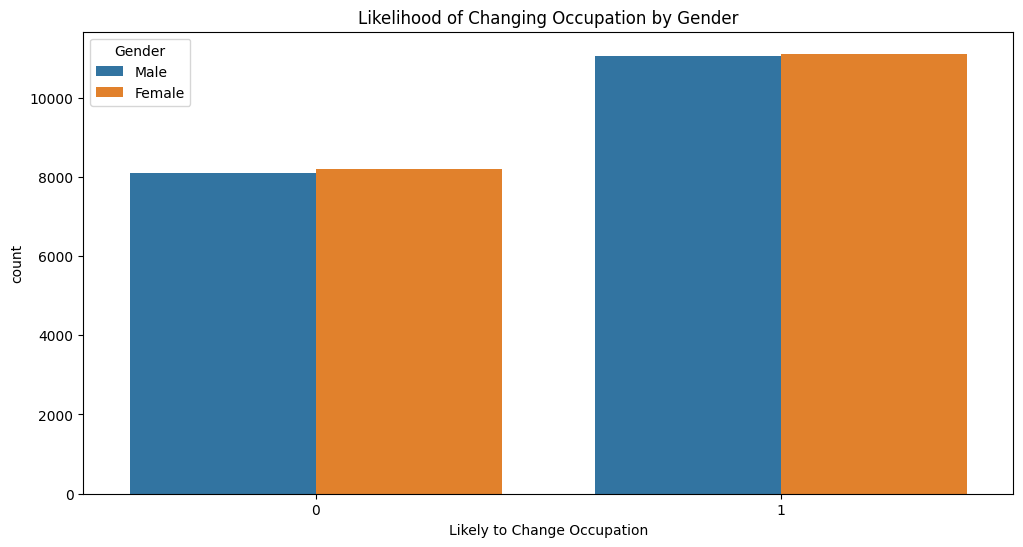

In [39]:
# load dataset
dataset_path = "datasets/field-of-study-vs-occupation/career_change_prediction_dataset.csv"
data = pd.read_csv(dataset_path)

# print(data.head())

# Data Preprocessing
# Handle missing values
data.ffill(inplace=True)

#Feature Engineering
# Convert categorical variables to numerical using one-hot encoding
data1 = pd.get_dummies(data, columns=['Field of Study', 'Current Occupation', 'Education Level'], drop_first=True)

#Create a new feature for years of experience
data1['Years of Experience'] = data1['Years of Experience'].astype(int)

#Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Likely to Change Occupation', hue='Gender')
plt.title('Likelihood of Changing Occupation by Gender')
plt.show()



In [41]:
data2 = pd.get_dummies(data, columns=['Field of Study', 'Current Occupation', 'Education Level', 'Gender', 'Industry Growth Rate', 'Family Influence'], drop_first=True)

# Ensure 'Likely to Change Occupation' is numeric
data2['Likely to Change Occupation'] = data2['Likely to Change Occupation'].astype(int)

# Prepare data for modeling
X = data2.drop('Likely to Change Occupation', axis=1) # Features
y = data2['Likely to Change Occupation'] # Target Variables


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


#Build a predictive model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689

[[3211    1]
 [   0 4477]]
